In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 500)

# Data Understanding

In [3]:
## Understanding Data
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
df.shape

(99999, 226)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
df.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [7]:
## total missing data count in the df
df.isnull().sum().sum()

3594931

In [8]:
df.shape

(99999, 226)

## Deaing with Missing value

In [9]:
## Handeling missing value
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
...,...
max_rech_amt_7,0.00
max_rech_amt_6,0.00
total_rech_amt_9,0.00
total_rech_amt_8,0.00


In [10]:
df.shape

(99999, 226)

In [11]:
# Columns with more than 30% missing values
col_list_missing_30 = list(df_missing_columns.index[df_missing_columns['null'] > 30])
df.shape

(99999, 226)

In [12]:
# Delete the columns with more than 30% missing values
df = df.drop(col_list_missing_30, axis=1)

In [13]:
df.shape

(99999, 186)

In [14]:
#removing the date columns because they are not needed for our analysis.
# List the date columns
date_cols = [k for k in df.columns.to_list() if 'date' in k]
print(date_cols)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [15]:
# Dropping date columns
df = df.drop(date_cols, axis=1)

In [16]:
df.shape

(99999, 178)

In [17]:
##Dropping the circle_id column.It only has one distinct value. So, this column will have no effect on the data analysis.
# Drop circle_id column
df = df.drop('circle_id', axis=1)

In [18]:
df.shape

(99999, 177)

In [19]:
## Select only valuable clients
#column avg_rech_amt_6_7 is created by adding the total recharge amounts for months 6 and 7. take the sum's average after that.
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

In [20]:
#70th percentile of the avg_rech_amt_6_7
X = df['avg_rech_amt_6_7'].quantile(0.7)
X

368.5

In [21]:
##find the clients who have equal to or more than 0 percentile
df = df[df['avg_rech_amt_6_7'] >= X]
df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,2

In [22]:
df.shape

(30011, 178)

In [23]:
##Dealing with missig value in rows
df_missing_rows_50 = df[(df.isnull().sum(axis=1)) > (len(df.columns)//2)]
df_missing_rows_50.shape


(114, 178)

In [24]:
# Removing the rows with more than 50% missing values
df = df.drop(df_missing_rows_50.index)
df.shape

(29897, 178)

In [25]:
##Checking the missing values in columns again
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
loc_ic_mou_9,5.32
og_others_9,5.32
loc_og_t2t_mou_9,5.32
loc_ic_t2t_mou_9,5.32
loc_og_t2m_mou_9,5.32
...,...
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00
last_day_rch_amt_6,0.00


In [26]:
##It appears that MOU for all call types for the month of September (9) has missing values grouped together for any given record.
##Check the data for the MOU for September (9), where these columns together lack values.

# Listing the columns of MOU Sep(9)
print(((df_missing_columns[df_missing_columns['null'] == 5.32]).index).to_list())

['loc_ic_mou_9', 'og_others_9', 'loc_og_t2t_mou_9', 'loc_ic_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'std_ic_t2m_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'roam_og_mou_9', 'std_ic_t2o_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'spl_og_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'std_ic_t2t_mou_9', 'std_ic_mou_9', 'onnet_mou_9', 'spl_ic_mou_9', 'ic_others_9', 'isd_ic_mou_9', 'loc_ic_t2f_mou_9', 'offnet_mou_9', 'loc_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'roam_ic_mou_9']


In [27]:
# Creating a df with the condition, in which MOU for Sep(9) are null
df_null_mou_9 = df[(df['loc_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2f_mou_9'].isnull()) & (df['roam_og_mou_9'].isnull()) & (df['std_ic_t2m_mou_9'].isnull()) &
  (df['loc_og_t2t_mou_9'].isnull()) & (df['std_ic_t2t_mou_9'].isnull()) & (df['loc_og_t2f_mou_9'].isnull()) & (df['loc_ic_mou_9'].isnull()) &
  (df['loc_og_t2c_mou_9'].isnull()) & (df['loc_og_mou_9'].isnull()) & (df['std_og_t2t_mou_9'].isnull()) & (df['roam_ic_mou_9'].isnull()) &
  (df['loc_ic_t2m_mou_9'].isnull()) & (df['std_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2t_mou_9'].isnull()) & (df['std_og_t2f_mou_9'].isnull()) & 
  (df['std_og_t2c_mou_9'].isnull()) & (df['og_others_9'].isnull()) & (df['std_og_mou_9'].isnull()) & (df['spl_og_mou_9'].isnull()) & 
  (df['std_ic_t2f_mou_9'].isnull()) & (df['isd_og_mou_9'].isnull()) & (df['std_ic_mou_9'].isnull()) & (df['offnet_mou_9'].isnull()) & 
  (df['isd_ic_mou_9'].isnull()) & (df['ic_others_9'].isnull()) & (df['std_ic_t2o_mou_9'].isnull()) & (df['onnet_mou_9'].isnull()) & 
  (df['spl_ic_mou_9'].isnull())]

df_null_mou_9.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.0,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.0,0.0,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.0,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.0,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,0.0,0.0,0.0,374.863,294.023,183.043,0.0,433.59,415.66,221.06,NaN,74.54,43.66,31.86,NaN,0.00,0.00,6.16,NaN,0.00,0.00,23.91,NaN,2.83,16.19,9.73,NaN,16.99,23.14,17.79,NaN,3.54,1.46,1.83,NaN,0.40,0.0,0.0,NaN,23.38,40.81,29.36,NaN,430.76,399.46,191.31,NaN,53.59,13.81,8.33,NaN,0.00,0.00,0.00,NaN,0.0,0.0,0.0,NaN,484.36,413.28,199.64,NaN,0.0,0.00,0.00,NaN,2.54,11.81,2.01,NaN,0.86,0.0,0.0,NaN,511.16,465.91,231.03,0.0,11.61,32.89,4.46,NaN,16.94,26.94,26.63,NaN,0.98,0.63,0.00,NaN,29.54,60.48,31.09,NaN,0.49,1.36,1.06,NaN,0.00,4

In [28]:
df_null_mou_9.shape

(1590, 178)

In [29]:
# Removing 1590 records for which MOU for Sep(9) are null
df = df.drop(df_null_mou_9.index)

In [30]:
df.shape

(28307, 178)

In [31]:
##Checking the missing values in columns again
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
isd_og_mou_8,0.55
roam_ic_mou_8,0.55
loc_og_mou_8,0.55
std_ic_t2o_mou_8,0.55
roam_og_mou_8,0.55
...,...
total_og_mou_9,0.00
total_og_mou_8,0.00
total_og_mou_7,0.00
total_og_mou_6,0.00


In [32]:
## For every given record, we can see that MOU for all call types for the month of August (8) has missing values grouped together.
#Check the records for the MOU for August (8) to see if there are any missing numbers for both of these columns.
# Listing the columns of MOU Aug(8)
print(((df_missing_columns[df_missing_columns['null'] == 0.55]).index).to_list())

['isd_og_mou_8', 'roam_ic_mou_8', 'loc_og_mou_8', 'std_ic_t2o_mou_8', 'roam_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'std_ic_t2m_mou_8', 'loc_og_t2f_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'loc_og_t2c_mou_8', 'std_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'std_og_t2f_mou_8', 'spl_ic_mou_8', 'std_ic_mou_8', 'offnet_mou_8', 'ic_others_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'onnet_mou_8', 'isd_ic_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8']


In [33]:
# Creating a df with the condition, in which MOU for Aug(8) are null
df_null_mou_8 = df[(df['loc_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2f_mou_8'].isnull()) & (df['roam_og_mou_8'].isnull()) & (df['std_ic_t2m_mou_8'].isnull()) &
  (df['loc_og_t2t_mou_8'].isnull()) & (df['std_ic_t2t_mou_8'].isnull()) & (df['loc_og_t2f_mou_8'].isnull()) & (df['loc_ic_mou_8'].isnull()) &
  (df['loc_og_t2c_mou_8'].isnull()) & (df['loc_og_mou_8'].isnull()) & (df['std_og_t2t_mou_8'].isnull()) & (df['roam_ic_mou_8'].isnull()) &
  (df['loc_ic_t2m_mou_8'].isnull()) & (df['std_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2t_mou_8'].isnull()) & (df['std_og_t2f_mou_8'].isnull()) & 
  (df['std_og_t2c_mou_8'].isnull()) & (df['og_others_8'].isnull()) & (df['std_og_mou_8'].isnull()) & (df['spl_og_mou_8'].isnull()) & 
  (df['std_ic_t2f_mou_8'].isnull()) & (df['isd_og_mou_8'].isnull()) & (df['std_ic_mou_8'].isnull()) & (df['offnet_mou_8'].isnull()) & 
  (df['isd_ic_mou_8'].isnull()) & (df['ic_others_8'].isnull()) & (df['std_ic_t2o_mou_8'].isnull()) & (df['onnet_mou_8'].isnull()) & 
  (df['spl_ic_mou_8'].isnull())]

df_null_mou_8.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
375,7002252754,0.0,0.0,0.0,580.477,111.878,0.0,378.881,249.43,39.64,NaN,245.06,62.24,37.24,NaN,144.53,25.49,19.43,NaN,0.00,312.59,78.58,NaN,0.00,0.00,0.00,NaN,11.54,0.00,0.00,NaN,25.31,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.41,0.00,0.00,NaN,36.86,0.00,0.00,NaN,233.51,0.00,0.00,NaN,118.79,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.00,0.00,NaN,352.31,0.0,0.0,NaN,0.0,0.00,0.00,NaN,4.78,0.00,0.0,NaN,0.0,0.00,0.00,0.0,393.96,0.00,0.00,NaN,6.74,0.00,0.00,NaN,38.53,0.00,0.00,NaN,0.0,0.00,0.00,NaN,45.28,0.00,0.00,NaN,8.31,0.00,0.00,NaN,27.31,0.00,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.00,0.00,NaN,35.63,0.00,0.00,0.0,80.91,0.00,0.0,NaN,0.00,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.0,17,6,3,11,700,130,0,440,80,50,0,50,30,0,0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1102,0.0,0.0,0.0,0.0,415.0
578,7000248548,0.0,0.0,0.0,569.612,237.289,0.0,4.440,718.01,212.73,NaN,0.00,487.06,139.71,NaN,1.26,0.00,2.01,NaN,6.43,0.00,6.30,NaN,1.26,11.28,27.89,NaN,0.00,42.24,46.94,NaN,0.00,0.0,0.0,NaN,0.0,2.33,0.0,NaN,0.00,53.53,74.84,NaN,0.00,706.73,178.53,NaN,0.00,442.48,92.76,NaN,0.00,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,1149.21,271.29,NaN,0.00,0.0,0.0,NaN,0.0,2.58,1.21,NaN,0.00,1.55,0.0,NaN,0.0,1206.88,347.36,0.0,0.00,48.01,63.39,NaN,0.00,83.09,64.31,NaN,0.00,0.00,0.00,NaN,0.0,131.11,127.71,NaN,0.00,24.98,46.43,NaN,0.00,1.63,16.69,NaN,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,0.0,26.61,63.13,NaN,0.00,157.73,190.84,0.0,0.00,0.00,0.0,NaN,0.00,0.

In [34]:
# Deleting the records for which MOU for Aug(8) are null
df = df.drop(df_null_mou_8.index)

In [35]:
df.shape

(28150, 178)

In [36]:
##Checking the missing values in columns again
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
roam_ic_mou_6,0.44
spl_og_mou_6,0.44
og_others_6,0.44
loc_ic_t2t_mou_6,0.44
loc_og_t2m_mou_6,0.44
...,...
isd_og_mou_9,0.00
isd_og_mou_8,0.00
std_og_mou_9,0.00
std_og_mou_8,0.00


In [37]:
## We can see that MOU for all call types for the month of Jun (6) has missing values grouped together.
#Check the records for the MOU for jun (6) to see if there are any missing numbers for both of these columns.
# Listing the columns of MOU jun(8)
print(((df_missing_columns[df_missing_columns['null'] == 0.44]).index).to_list())

['roam_ic_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2c_mou_6', 'loc_ic_t2m_mou_6', 'isd_og_mou_6', 'loc_og_t2t_mou_6', 'std_og_t2m_mou_6', 'loc_ic_t2f_mou_6', 'ic_others_6', 'roam_og_mou_6', 'loc_ic_mou_6', 'std_og_mou_6', 'loc_og_t2f_mou_6', 'isd_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_mou_6', 'std_og_t2t_mou_6', 'std_ic_t2o_mou_6', 'std_og_t2f_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'onnet_mou_6', 'std_og_t2c_mou_6', 'std_ic_t2m_mou_6', 'offnet_mou_6', 'loc_og_mou_6']


In [38]:
# Creating a df with the condition, in which MOU for Jun(6) are null
df_null_mou_6 = df[(df['loc_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2f_mou_6'].isnull()) & (df['roam_og_mou_6'].isnull()) & (df['std_ic_t2m_mou_6'].isnull()) &
  (df['loc_og_t2t_mou_6'].isnull()) & (df['std_ic_t2t_mou_6'].isnull()) & (df['loc_og_t2f_mou_6'].isnull()) & (df['loc_ic_mou_6'].isnull()) &
  (df['loc_og_t2c_mou_6'].isnull()) & (df['loc_og_mou_6'].isnull()) & (df['std_og_t2t_mou_6'].isnull()) & (df['roam_ic_mou_6'].isnull()) &
  (df['loc_ic_t2m_mou_6'].isnull()) & (df['std_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2t_mou_6'].isnull()) & (df['std_og_t2f_mou_6'].isnull()) & 
  (df['std_og_t2c_mou_6'].isnull()) & (df['og_others_6'].isnull()) & (df['std_og_mou_6'].isnull()) & (df['spl_og_mou_6'].isnull()) & 
  (df['std_ic_t2f_mou_6'].isnull()) & (df['isd_og_mou_6'].isnull()) & (df['std_ic_mou_6'].isnull()) & (df['offnet_mou_6'].isnull()) & 
  (df['isd_ic_mou_6'].isnull()) & (df['ic_others_6'].isnull()) & (df['std_ic_t2o_mou_6'].isnull()) & (df['onnet_mou_6'].isnull()) & 
  (df['spl_ic_mou_6'].isnull())]

df_null_mou_6.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
77,7001328263,0.0,0.0,0.0,30.000,82.378,674.950,158.710,NaN,34.23,149.69,6.31,NaN,39.44,179.18,57.68,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,34.23,149.69,6.31,NaN,32.18,101.63,29.41,NaN,0.91,29.86,28.26,NaN,0.0,3.9,0.00,NaN,67.33,281.19,63.99,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,6.35,40.09,0.0,NaN,0.0,0.0,0.0,NaN,6.35,40.09,0.00,NaN,2.93,28.04,3.25,NaN,0.00,7.58,0.00,NaN,0.0,0.0,0.0,0.0,76.61,356.93,67.24,NaN,79.46,191.24,5.26,NaN,43.31,94.18,16.39,NaN,2.03,0.00,15.78,NaN,124.81,285.43,37.44,NaN,8.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,15.93,NaN,0.0,0.0,0.0,NaN,8.00,0.00,15.93,0.0,135.38,289.33,53.38,NaN,0.0,0.0,0.0,NaN,2.56,0.50,0.00,NaN,0.0,3.39,0.0,4,5,3,3,0,1154,750,0,0,1000,750,0,0,0,750,0,0.0,96.48,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
364,7002168045,0.0,0.0,0.0,0.000,792.112,989.368,923.040,NaN,433.49,198.96,571.99,NaN,845.11,923.58,828.29,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,28.78,7.46,64.73,NaN,78.78,584.76,490.71,NaN,21.58,9.43,0.00,NaN,0.0,0.0,2.78,NaN,129.14,601.66,555.44,NaN,404.71,191.49,507.26,NaN,722.01,321.41,302.91,NaN,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,1126.73,512.91,810.18,NaN,0.00,0.00,0.00,NaN,45.14,13.84,37.74,NaN,0.0,0.0,0.0,0.0,1301.03,1128.43,1403.38,NaN,7.41,10.23,17.46,NaN,69.39,93.48,44.89,NaN,0.00,0.83,0.00,NaN,76.81,104.54,62.36,NaN,5.81,10.09,22.36,NaN,37.94,86.63,34.49,NaN,0.0,0.00,0.00,NaN,0.0,

In [39]:
# Removing the records for which MOU for Jun(6) are null
df = df.drop(df_null_mou_6.index)

In [40]:
df.shape

(28026, 178)

In [41]:
##Checking the missing values in columns again
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
loc_ic_t2f_mou_7,0.12
isd_ic_mou_7,0.12
loc_og_t2f_mou_7,0.12
loc_og_t2c_mou_7,0.12
loc_og_mou_7,0.12
...,...
spl_og_mou_6,0.00
spl_og_mou_8,0.00
spl_og_mou_9,0.00
og_others_6,0.00


In [42]:
## We can see that MOU for all call types for the month of July (7) has missing values grouped together.
#Check the records for the MOU for july (7) to see if there are any missing numbers for both of these columns.
# Listing the columns of MOU july (7)
print(((df_missing_columns[df_missing_columns['null'] == 0.12]).index).to_list())

['loc_ic_t2f_mou_7', 'isd_ic_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'ic_others_7', 'isd_og_mou_7', 'spl_og_mou_7', 'loc_og_t2t_mou_7', 'og_others_7', 'spl_ic_mou_7', 'loc_ic_t2t_mou_7', 'std_ic_mou_7', 'loc_ic_t2m_mou_7', 'std_ic_t2o_mou_7', 'std_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'loc_og_t2m_mou_7', 'std_og_t2m_mou_7', 'std_ic_t2m_mou_7', 'roam_ic_mou_7', 'onnet_mou_7', 'roam_og_mou_7', 'offnet_mou_7']


In [43]:
# Creating a df with the condition, in which MOU for Jul(7) are null
df_null_mou_7 = df[(df['loc_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2f_mou_7'].isnull()) & (df['roam_og_mou_7'].isnull()) & (df['std_ic_t2m_mou_7'].isnull()) &
  (df['loc_og_t2t_mou_7'].isnull()) & (df['std_ic_t2t_mou_7'].isnull()) & (df['loc_og_t2f_mou_7'].isnull()) & (df['loc_ic_mou_7'].isnull()) &
  (df['loc_og_t2c_mou_7'].isnull()) & (df['loc_og_mou_7'].isnull()) & (df['std_og_t2t_mou_7'].isnull()) & (df['roam_ic_mou_7'].isnull()) &
  (df['loc_ic_t2m_mou_7'].isnull()) & (df['std_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2t_mou_7'].isnull()) & (df['std_og_t2f_mou_7'].isnull()) & 
  (df['std_og_t2c_mou_7'].isnull()) & (df['og_others_7'].isnull()) & (df['std_og_mou_7'].isnull()) & (df['spl_og_mou_7'].isnull()) & 
  (df['std_ic_t2f_mou_7'].isnull()) & (df['isd_og_mou_7'].isnull()) & (df['std_ic_mou_7'].isnull()) & (df['offnet_mou_7'].isnull()) & 
  (df['isd_ic_mou_7'].isnull()) & (df['ic_others_7'].isnull()) & (df['std_ic_t2o_mou_7'].isnull()) & (df['onnet_mou_7'].isnull()) & 
  (df['spl_ic_mou_7'].isnull())]

df_null_mou_7.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
5616,7001238202,0.0,0.0,0.0,760.815,531.088,992.818,1144.676,324.91,NaN,386.13,1180.29,350.29,NaN,399.64,887.76,463.63,NaN,221.46,0.0,505.71,NaN,175.93,0.0,145.91,NaN,243.43,1108.38,0.85,NaN,184.78,300.19,1.13,NaN,7.94,67.11,0.00,NaN,12.51,18.89,147.89,NaN,436.16,1475.69,0.96,NaN,17.06,69.51,15.91,NaN,144.04,490.61,0.00,NaN,0.0,13.33,0.0,NaN,0.0,0.0,16.88,NaN,161.11,573.46,0.00,NaN,0.00,0.00,4.71,NaN,12.56,18.89,0.00,NaN,0.0,0.0,169.49,0.0,609.84,2068.06,78.76,NaN,233.66,558.84,1.36,NaN,11.53,75.31,6.61,NaN,0.00,31.81,86.74,NaN,245.19,665.98,0.00,NaN,12.13,42.39,21.76,NaN,110.99,263.98,0.0,NaN,0.00,6.43,0.0,NaN,0.0,0.0,21.76,NaN,123.13,312.81,189.81,0.0,397.13,1020.16,0.00,NaN,0.00,0.13,81.29,NaN,28.79,41.23,0.00,NaN,0.00,0.00,5,7,9,13,776,780,904,1591,250,330,200,289,250,0,130,250,0.00,0.0,11.26,83.32,0.0,0.0,79.94,668.4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,576,63.38,0.0,0.0,163.39,778.0
9451,7001477649,0.0,0.0,0.0,1129.566,0.000,128.252,802.648,11.89,NaN,1.46,33.89,259.18,NaN,26.21,241.18,9.98,NaN,1.73,0.0,5.66,NaN,2.46,0.0,6.73,NaN,1.46,20.84,171.46,NaN,20.54,148.88,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,178.19,NaN,22.01,169.73,5.16,NaN,0.00,13.05,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,0.0,NaN,0.0,0.0,5.16,NaN,0.00,13.05,74.91,NaN,4.74,92.29,7.13,NaN,0.00,1.08,0.00,NaN,0.0,0.0,265.41,0.0,26.76,276.16,17.24,NaN,0.60,36.69,130.09,NaN,16.54,110.19,25.46,NaN,8.76,40.24,172.81,NaN,25.91,187.14,1.50,NaN

In [44]:
# Removing the records for which MOU for Jul(7) are null
df = df.drop(df_null_mou_7.index)

In [45]:
df.shape

(27991, 178)

In [46]:
##Checking the missing values in columns again
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
mobile_number,0.0
total_rech_num_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0
...,...
std_og_mou_7,0.0
std_og_mou_8,0.0
std_og_mou_9,0.0
isd_og_mou_6,0.0


In [47]:
# Checking percentage of rows we have lost while handling the missing values
round((1- (len(df.index)/30011)),2)

0.07

In [48]:
##tagging Cherners
## depending on the fourth month, tag the customers who churned (churn=1, otherwise 0) as follows: 
## In the churn phase, those who have not placed any calls (incoming or outgoing) OR accessed mobile internet even once.
df['churn'] = np.where((df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0), 1, 0)

In [49]:
df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9',"churn"]].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,churn
8,34.91,142.18,0.0,0
13,631.86,446.09,0.0,0
16,334.56,255.74,0.0,0
17,87.13,631.08,0.0,0
21,252.61,1031.53,0.0,0


In [50]:
df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,701.78,138.93,655.18,326.39,0.0,0.0,1.29,0.0,0.00,0.00,4.78,0.00,0.00,0.0,0.0,0.0,907.09,192.41,1015.26,446.09,67.88,7.58,52.58,24.98,142.88,18.53,195.18,104.79,4.81,

In [51]:
# List the columns for churn month(9)
col_9 = [col for col in df.columns.to_list() if '_9' in col]
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [52]:
# Deleting the churn month columns
df = df.drop(col_9, axis=1)

In [53]:
df.shape

(27991, 137)

In [54]:
# Removing sep_vbc_3g column
df = df.drop('sep_vbc_3g', axis=1)

In [55]:
##Churn percentage
round(100*(df['churn'].mean()),2)

3.39

In [56]:
##Outliers
#Except for the mobile_number and churn columns, all of the columns in the filtered dataset are of the numeric type.
#Consequently, mobile_number and churn datatypes were converted to objects.
df['mobile_number'] = df['mobile_number'].astype(object)
df['churn'] = df['churn'].astype(object)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27991 entries, 8 to 99997
Columns: 136 entries, mobile_number to churn
dtypes: float64(109), int64(25), object(2)
memory usage: 29.3+ MB


In [58]:
# List only the numeric columns
numeric_cols = df.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_amt_6_7'],
      dtype='object', length=134)


In [59]:
# Removing outliers below 10th and above 90th percentile
for col in numeric_cols: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = df.loc[(df[col] > range_low) & (df[col] < range_high)]

data.shape

(27705, 136)

In [60]:
##Derive new features
# List the columns of total mou, rech_num and rech_amt
[total for total in data.columns.to_list() if 'total' in total]


['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

In [61]:
##Deriving new column decrease_mou_action
##This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.
# Total mou at good phase incoming and outgoing
data['total_mou_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6'])

In [62]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
data['avg_mou_action'] = (data['total_og_mou_7'] + data['total_og_mou_8'] + data['total_ic_mou_7'] + data['total_ic_mou_8'])/2

In [63]:
# Difference avg_mou_good and avg_mou_action
data['diff_mou'] = data['avg_mou_action'] - data['total_mou_good']

In [64]:
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)

In [65]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,0.0,0.0,0.0,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0

In [66]:
##Deriving new column decrease_rech_num_action
##This column shows whether the number of recharge of the customer has decreased in the action phase than the good phase.
# Avg rech number at action phase
data['avg_rech_num_action'] = (data['total_rech_num_7'] + data['total_rech_num_8'])/2

In [67]:
# Difference total_rech_num_6 and avg_rech_action
data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']

In [68]:
# Checking if rech_num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

In [69]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,7

In [70]:
##Deriving new column decrease_rech_amt_action
#his column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [71]:
# Avg rech_amt in action phase
data['avg_rech_amt_action'] = (data['total_rech_amt_7'] + data['total_rech_amt_8'])/2

In [72]:
# Difference of action phase rech amt and good phase rech amt
data['diff_rech_amt'] = data['avg_rech_amt_action'] - data['total_rech_amt_6']

In [73]:
# Checking if rech_amt has decreased in action phase
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0)

In [74]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,2

In [75]:
##Deriving new column decrease_arpu_action
##This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [76]:
# ARUP in action phase
data['avg_arpu_action'] = (data['arpu_7'] + data['arpu_8'])/2

In [77]:
# Difference of good and action phase ARPU
data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']

In [78]:
# Checking whether the arpu has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

In [79]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,

In [80]:
##Deriving new column decrease_vbc_action
##This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [81]:
# VBC in action phase
data['avg_vbc_3g_action'] = (data['jul_vbc_3g'] + data['aug_vbc_3g'])/2

In [82]:

# Difference of good and action phase VBC
data['diff_vbc'] = data['avg_vbc_3g_action'] - data['jun_vbc_3g']

In [83]:
# Checking whether the VBC has decreased on the action month
data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)

In [84]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.

## EDA Univariate analysis
### Churn rate on the basis whether the customer decreased her/his MOU in action month

In [86]:
# Converting churn column to int in order to do aggfunc in the pivot table
data['churn'] = data['churn'].astype('int64')

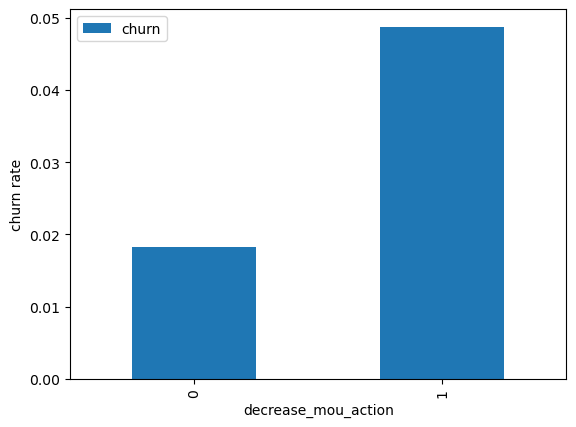

In [87]:
data.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

In [88]:
## Finding
#We can see that the consumers with lower minutes of usage (mou) during the action phase as opposed to the good phase have a higher churn rate.
#Churn rate determined by the number of recharges a client made within a given month.

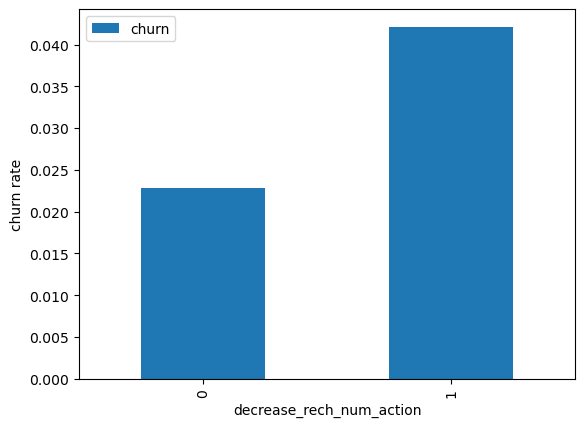

In [89]:
data.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

## Finding
 The same behaviour is evident here as well. Customers who recharge less frequently during the action phase than during the good phase have higher churn rates.
 
Churn rate based on whether the client reduced their volume-based cost in action month


## Analysis of the action phase's average revenue per customer (churn and not churn)

In [92]:
# Creating churn dataframe
data_churn = data[data['churn'] == 1]
# Creating not churn dataframe
data_non_churn = data[data['churn'] == 0]

[Text(0.5, 0, 'Action phase ARPU')]

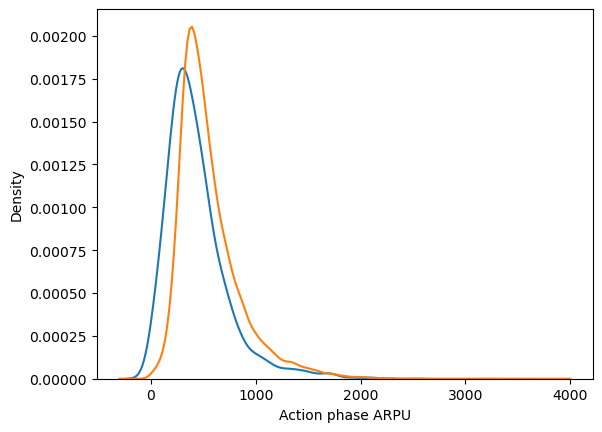

In [93]:
# Distribution plot
ax = sns.distplot(data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

## Analysis (Above)

Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned.
ARPU for the not churned customers is mostly densed on the 0 to 1000.
Analysis of the minutes of usage MOU (churn and not churn) in the action phase

In [95]:
##Bivariate analysis
#Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase

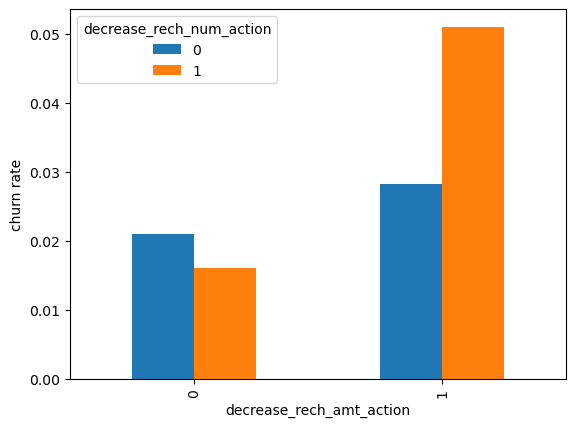

In [96]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

In [97]:
## Analysis (above)
#We can see from the above plot, that the churn rate is more for the customers,
#whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

# #Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase

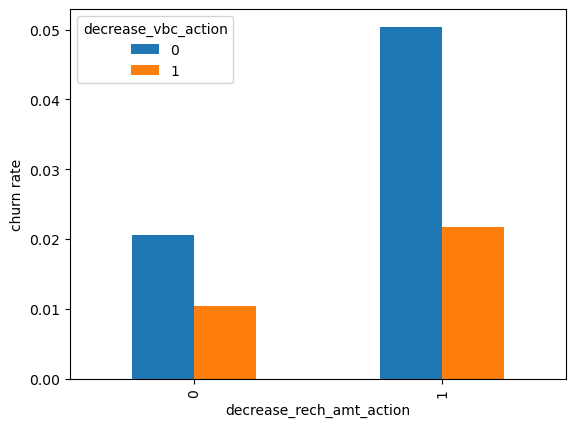

In [98]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

In [99]:
#Analysis (Above)
#We can see that the churn rate is higher in this instance as well for consumers whose recharge amounts are reduced as the volume-based costs rise during the action month.
#Analysis of the recharge amount and recharge rate in the current month

In [100]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.

In [101]:
data['avg_rech_num_action'].shape


(27705,)

In [102]:
data['avg_rech_amt_action'].shape

(27705,)

In [103]:
data['churn'].shape

(27705,)

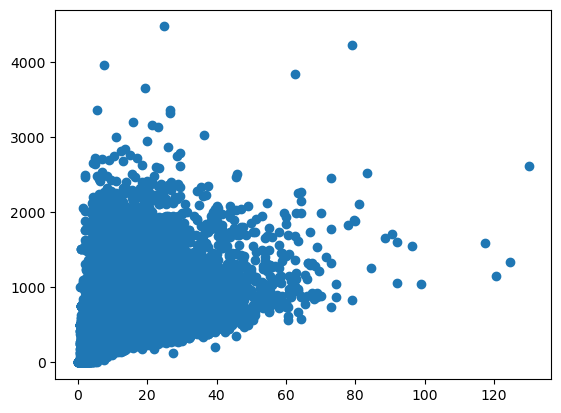

In [104]:
plt.scatter(data['avg_rech_num_action'],data['avg_rech_amt_action'])

In [105]:
df=data

In [106]:
df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.

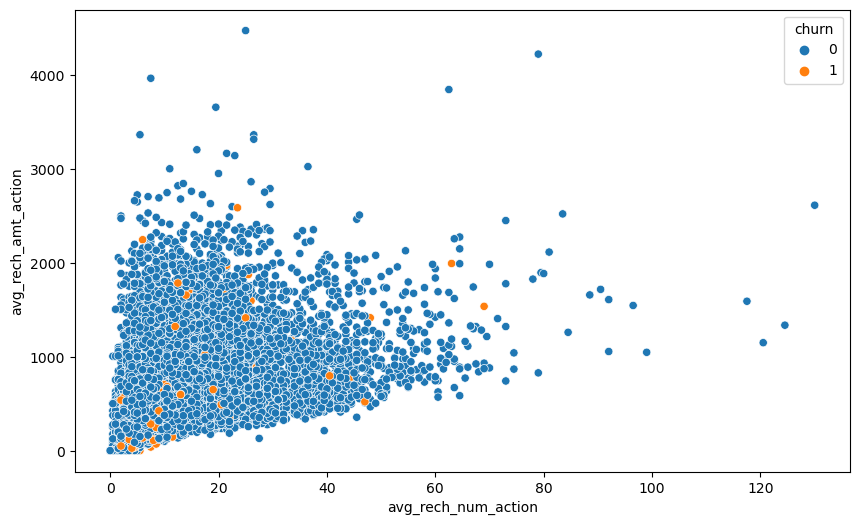

In [107]:
##Analysis of recharge amount and number of recharge in action month
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='avg_rech_num_action',y='avg_rech_amt_action', hue='churn', data=data)

## Analysis
The pattern demonstrates that the recharge quantity and amount are primarily propotional.
The amount of the recharge increases with the number of recharges.

## removing a few derived columns that won't be used in the subsequent analysis

In [110]:
data = data.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_rech_amt_6_7'], axis=1)

## Train-Test Split


In [111]:
# Import library
from sklearn.model_selection import train_test_split


In [112]:
# Putting feature variables into X
X = data.drop(['mobile_number','churn'], axis=1)

In [113]:
# Putting target variable to y
y = data['churn']

In [114]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [115]:
!pip install imblearn

## Dealing with data imbalance
#### Creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [116]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [117]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)

In [118]:
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

### Feature Scaling

In [120]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [121]:
# Instantiate the Scaler
scaler = StandardScaler()

In [122]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')

In [123]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [124]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
0,0.0,0.0,0.0,0.140777,-0.522792,-0.276289,0.106540,-0.662084,-0.465777,-0.211202,-0.636415,0.317224,-0.254996,-0.001208,-0.235211,-0.300833,-0.374857,-0.412810,-0.263308,-0.311548,-0.251411,0.485770,-0.190660,-0.399182,-0.256866,-0.267401,-0.244832,-0.191587,-0.267368,-0.244432,0.129144,-0.335468,-0.418749,0.254982,-0.528622,-0.338018,-0.342394,-0.504282,0.650664,-0.143576,-0.139257,-0.119299,0.0,0.0,0.0,-0.048161,-0.731560,0.214243,-0.080803,-0.092449,-0.061631,-0.347585,-0.363159,-0.017165,-0.346191,-0.015583,-0.013735,-0.000389,-0.860412,-0.011382,-0.203981,-0.266718,-0.242771,-0.380593,-0.272733,-0.437571,-0.290528,-0.270877,-0.150060,-0.409101,-0.363983,-0.440411,-0.175106,-0.159825,0.078711,-0.164347,0.367474,-0.117454,-0.135479,-0.137327,-0.110642,0.0,0.0,0.0,-0.234904,0.121332,-0.064154,-0.475564,-0.287010,-0.420829,-0.366516,-0.089786,-0.192624,-0.151655,-0.153778,-0.126576,-0.099745,-0.121704,-0.081491,0.192736,-0.444988,0.305289,0.044172,-0.726027,-0.235478,0.054992,0.023937,0.029739,0.601511,-0.811577,-0.626096,-0.094017,0.696113,1.750783,0.510634,1.202971,-0.241652,3.236849,3.104207,-0.232664,4.023237,2.358097,2.447476,-0.224183,-0.221779,-0.216364,-0.141182,-0.136208,-0.113882,-0.361238,-0.236209,-0.265392,0.110582,1,1,1,1,1
1,0.0,0.0,0.0,-1.427243,4.428047,3.254270,-0.658491,-0.236590,-0.004450,-0.776075,2.523985,2.732154,-0.254996,-0.253231,-0.304660,-0.300833,-0.374857,-0.431026,-0.201396,0.270791,0.198344,-0.529474,1.106670,0.288951,-0.276320,-0.267401,-0.244832,-0.191587,-0.267368,-0.244432,-0.477059,0.843930,0.290569,-0.570615,-0.320253,-0.041333,-0.512504,2.294191,3.087483,-0.143576,-0.139257,-0.119299,0.0,0.0,0.0,-0.771902,1.368343,2.063999,-0.080803,-0.092449,-0.061631,-0.347585,-0.363159,-0.290355,-0.346191,-0.015583,-0.013735,-0.970285,1.670188,1.938953,-0.410762,0.193158,0.156537,-0.481723,0.744741,0.256589,-0.290528,-0.270877,-0.257696,-0.583307,0.570197,0.219470,-0.215496,-0.200464,-0.112725,-0.3551

In [125]:
##Scaling the test set
#We don't fit scaler on the test set. We only transform the test set.

In [126]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
5704,0.0,0.0,0.0,0.244310,-0.268832,1.005890,-0.725286,-0.690223,-0.476634,0.483540,0.307300,2.323745,-0.077655,-0.253231,-0.304660,0.215992,-0.374857,-0.431026,-0.278217,-0.282623,-0.106758,0.028192,0.006336,0.034141,-0.087435,-0.267401,-0.244832,0.037799,-0.267368,-0.244432,-0.161248,-0.195270,-0.055078,-0.610819,-0.570510,-0.420186,0.346789,0.369671,2.702104,-0.143576,-0.139257,-0.119299,0.0,0.0,0.0,-0.214836,-0.152215,1.550482,-0.080803,-0.092449,-0.061631,1.055196,0.774917,0.757960,0.315218,-0.015583,-0.013735,-0.254350,-0.209855,1.354152,-0.356975,-0.095026,0.281846,0.089162,-0.112790,0.515971,-0.290528,-0.270877,-0.194257,-0.156095,-0.166424,0.468259,-0.215496,-0.200464,-0.187265,0.113370,-0.185210,-0.166335,-0.135479,-0.137327,-0.110642,0.0,0.0,0.0,-0.077912,-0.265421,-0.233610,-0.194148,-0.204469,0.286255,-0.366516,-0.089786,-0.192624,-0.151655,0.285066,-0.126576,-0.099745,-0.121704,-0.081491,-0.156412,0.260837,1.306523,0.087587,-0.236774,0.817300,0.054992,-0.173563,0.029739,0.175643,0.368450,-0.351085,3.313695,2.175444,-0.098306,-0.262491,-0.063995,0.506232,3.236849,-0.251375,-0.232664,0.457379,2.358097,2.447476,-0.224183,-0.221779,-0.216364,1.315163,1.219546,2.526725,0.225051,0.018023,0.194794,-0.259366,0,0,1,1,0
64892,0.0,0.0,0.0,0.048359,-0.779609,-0.157969,-0.734066,-0.698072,-0.502219,-0.358555,-0.577717,-0.256061,0.022864,-0.253231,-0.304660,-0.120122,-0.374857,-0.431026,-0.278380,-0.302589,-0.174571,-0.300150,-0.204014,-0.295881,-0.261886,-0.267401,-0.244832,-0.191587,-0.267368,-0.244432,-0.379084,-0.337876,-0.306653,-0.619956,-0.570510,-0.415897,-0.231854,-0.437192,-0.040526,-0.143576,-0.139257,-0.104326,0.0,0.0,0.0,-0.616620,-0.714724,-0.306010,-0.080803,-0.092449,-0.061631,-0.327156,-0.363159,-0.290355,-0.346191,-0.015583,-0.013735,-0.775847,-0.845314,-0.422452,-0.107944,-0.347607,-0.187444,0.377903,0.199498,0.240935,-0.275866,-0.257495,-0.235146,0.172870,-0.078726,0.045944,-0.215496,-0.152024,0.151031,2.985

## Logistic regression 

In [129]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [130]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [131]:
#Tuning hyperparameter C
#C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [132]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [133]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [134]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.779086,0.032696,0.028882,0.006992,0.01,{'C': 0.01},0.919015,0.917134,0.914884,0.920624,0.908144,0.915960,0.004352,4,0.918323,0.915758,0.916321,0.915231,0.917324,0.916592,0.001110
1,1.371772,0.153590,0.040492,0.013396,0.1,{'C': 0.1},0.917357,0.919001,0.914419,0.918529,0.909070,0.915675,0.003667,6,0.918498,0.916399,0.916905,0.915874,0.917091,0.916953,0.000881
2,1.421699,0.160909,0.044033,0.012362,1,{'C': 1},0.916884,0.919234,0.914651,0.919227,0.910458,0.916091,0.003291,3,0.918847,0.915933,0.918307,0.916866,0.917149,0.917420,0.001041
3,1.338218,0.151589,0.045051,0.011208,10,{'C': 10},0.916884,0.919468,0.914419,0.919227,0.909533,0.915906,0.003674,5,0.918905,0.915991,0.918774,0.917158,0.917091,0.917584,0.001107
4,1.354962,0.095423,0.037828,0.005945,100,{'C': 100},0.916647,0.919468,0.914186,0.919460,0.911152,0.916183,0.003195,1,0.918905,0.916399,0.918423,0.916983,0.917734,0.917689,0.000914
5,1.437941,0.153929,0.042152,0.010630,1000,{'C': 1000},0.916884,0.919701,0.914186,0.919693,0.909995,0.916092,0.003672,2,0.919312,0.916458,0.918482,0.917100,0.916915,0.917653,0.001069


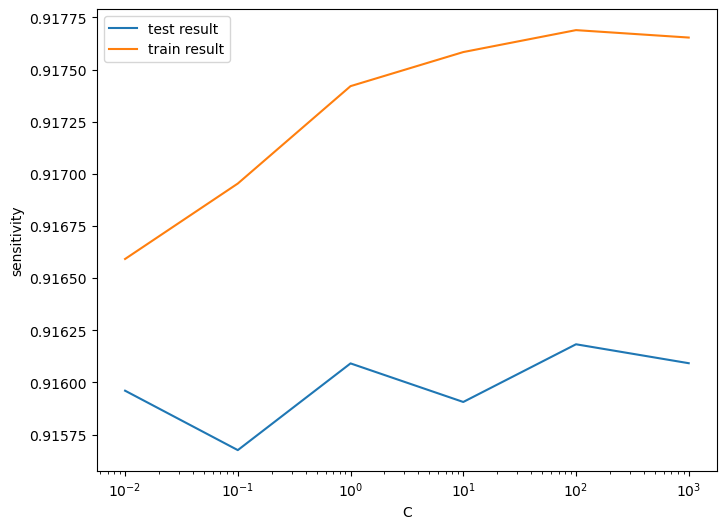

In [135]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [136]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.916182594834696 at C = 100


### Logistic regression with optimal C

In [137]:

# Instantiate the model with best C
logistic = LogisticRegression(C=best_C)

In [138]:
# Fit the model on the train set
log_model = logistic.fit(X_train, y_train)

In [139]:
# Predictions on the train set
y_train_pred = log_model.predict(X_train)

In [140]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[18241  3184]
 [ 1771 19654]]


In [141]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [142]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8843640606767794
Sensitivity:- 0.9173395565927654
Specificity:- 0.8513885647607935


In [143]:
# Prediction on the test set
y_test_pred = log_model.predict(X_test)

In [144]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4552  796]
 [  43  150]]


In [145]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [146]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8485832882151236
Sensitivity:- 0.7772020725388601
Specificity:- 0.8511593118922962


### Model summary

Train set
Accuracy = 0.88
Sensitivity = 0.92
Specificity = 0.85

Test set
Accuracy = 0.84
Sensitivity = 0.77
Specificity = 0.85

The model is performing well in the test set, what it had learnt from the train set.

## Random forest

In [148]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [149]:
##Hyperparameter tuning##
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [150]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9488447278986554 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 300}


In [151]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [152]:
# Fit the model
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

#### Predictions on the train set

In [153]:
y_train_pred = rfc_model.predict(X_train)

In [154]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[19580  1845]
 [  257 21168]]


In [155]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [156]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9509451575262544
Sensitivity:- 0.988004667444574
Specificity:- 0.9138856476079347


#### Prediction on the test set

In [157]:
y_test_pred = rfc_model.predict(X_test)

In [158]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4887  461]
 [  22  171]]


In [159]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [160]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9128316188413643
Sensitivity:- 0.8860103626943006
Specificity:- 0.9137995512341062


### Model summary

##### Train set
Accuracy = 0.84
Sensitivity = 0.88
Specificity = 0.80

#### Test set
Accuracy = 0.95
Sensitivity = 0.98
Specificity = 0.91


The model's performance shows that the sensitivity declined when it was being assessed on the test set. The test set's precision and specificity, however, are fairly high.




# Recomendations

1.Target the clients that use fewer minutes for incoming local calls and outgoing ISD calls during the action phase (mostly in August).

2.Additionally, clients that experience greater value-based costs throughout the action phase are more likely to leave than other customers. Therefore, making an offer to these customers may be a good idea.

3.Customers with higher August monthly 3G recharges are more likely to be churned.

4.Customers who used fewer STD inbound minutes on fixed T lines from operators T in August are more likely to churn.
5.Customers that use less 2G data each month in August are more likely to churn.

6.Customers who used less incoming minutes on fixed T lines from operators in August are more likely to churn.

7.Variables in roam_og_mou_8 have positive coefficients (0.7135). Customers who are using more roaming outbound minutes are hence more prone to churn.

In [161]:
!pip install rfpimp

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10660 sha256=c6cd82258f8edd041bc2ca6ac083603f4e1273ec59a727707f98db20a92d4467
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\89\e6\d8\5c44dd93f7714379f948b4c07bb03aad9f8ee1988c8141cf81
Successfully built rfpimp


In [162]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(rf, X_train, y_train, r2)

In [163]:
perm_imp_rfpimp

,Importance
Feature,
roam_ic_mou_8,0.117605
roam_og_mou_8,0.062403
std_ic_t2m_mou_6,0.001600
last_day_rch_amt_7,0.001600
last_day_rch_amt_8,0.001600
...,...
std_og_t2c_mou_8,0.000000
std_og_t2c_mou_7,0.000000
std_og_t2c_mou_6,0.000000


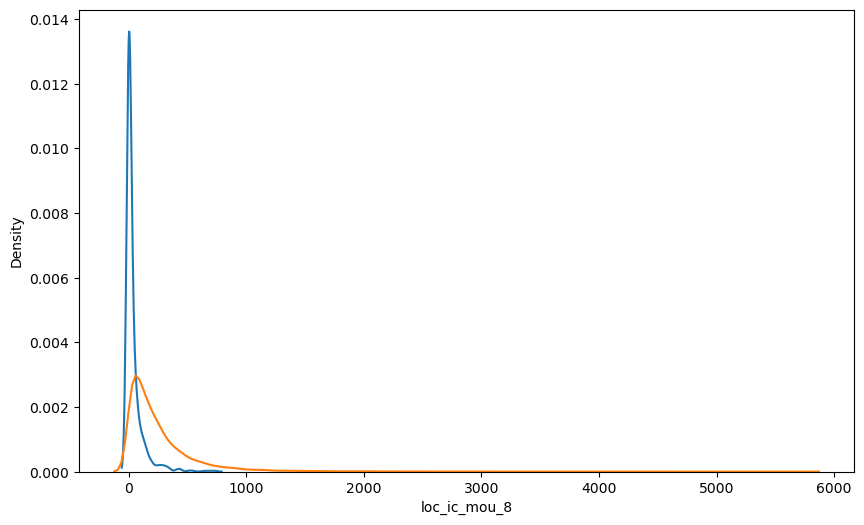

In [164]:
# Plotting loc_ic_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['loc_ic_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['loc_ic_mou_8'],label='not churn',hist=False)
plt.show()

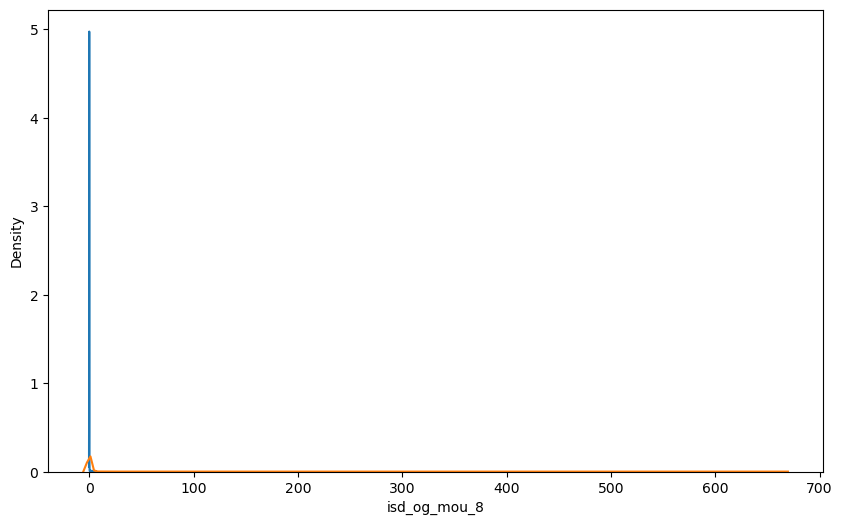

In [165]:
# Plotting isd_og_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['isd_og_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['isd_og_mou_8'],label='not churn',hist=False)
plt.show()

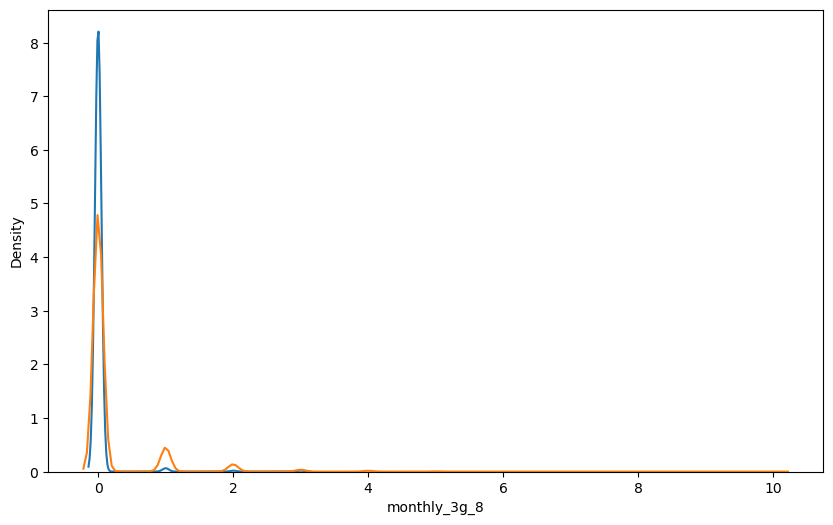

In [166]:
# Plotting monthly_3g_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['monthly_3g_8'],label='churn',hist=False)
sns.distplot(data_non_churn['monthly_3g_8'],label='not churn',hist=False)
plt.show()